In [31]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [32]:
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning) # FutureWarning 제거

In [33]:
# 국회의원 298명에 대한 정보를 담고 있는 member df, node가 될 예정
member = pd.read_excel('./raw_data/member_of_Congress.xlsx')
member.head(1)

,이름,한자명,영문명칭,음/양력,생년월일,정당명,선거구,대표 위원회,재선,당선,...,이메일,홈페이지,보좌관,비서관,비서,재직구분,직업,학력,경력,득표수
0,강기윤,姜起潤,KANG GIYUN,양,1960-06-04,국민의힘,경남 창원시성산구,보건복지위원회,재선,"제19대, 제21대",...,ggotop@naver.com,http://blog.naver.com/ggotop,한영애,"김샛별, 장원종","안효상, 빈자영, 이유진, 김지훈, 조옥자",60001,정당인,창원대학교 대학원 졸업(행정학 박사),(전)19대 국회의원\n(현)미래통합당 경남도당 민생위원회 위원장,"61,782\n(47.30)"


In [34]:
# member df 전처리 과정
member.loc[member['이름'] == '양원영', ['이름']] = '양이원영' # 이름 오류 수정
member['이름'] = member['이름'] + '(' + member['한자명'] + ')' # primary key인 이름(한자) 생성
member.sort_values(by = '이름', inplace = True) # 동명이인의 한자명에 따른 정렬 순서 이상 때문에 정렬 한 번
member.reset_index(drop = True, inplace = True) # 정렬에 따른 인덱스 이상 때문에 인덱스 정렬 한 번
member.drop(columns = ['한자명','영문명칭','음/양력','대표 위원회','당선','전화번호','사무실 호실','이메일','홈페이지','보좌관','비서관','비서','재직구분','직업','경력','득표수'], inplace = True)
member.head(3) # 필요 없는 데이터 잠깐 지우겠슴다

,이름,생년월일,정당명,선거구,재선,소속 위원회 목록,성별,학력
0,강기윤(姜起潤),1960-06-04,국민의힘,경남 창원시성산구,재선,보건복지위원회,남,창원대학교 대학원 졸업(행정학 박사)
1,강대식(姜大植),1959-11-02,국민의힘,대구 동구을,초선,국토교통위원회,남,영남대학교 대학원 경영학과 졸업(경영학박사)
2,강득구(姜得求),1963-05-27,더불어민주당,경기 안양시만안구,초선,"인구위기특별위원회, 교육위원회",남,연세대학교 행정대학원 졸업(행정학석사)


In [35]:
mem_dict = member['이름'].to_dict()
mem_dict = {v:k for k,v in mem_dict.items()}
print(mem_dict, sep = ' ')

{'강기윤(姜起潤)': 0, '강대식(姜大植)': 1, '강득구(姜得求)': 2, '강민국(姜旻局)': 3, '강민정(姜旼姃)': 4, '강병원(姜炳遠)': 5, '강선우(姜仙祐)': 6, '강성희(姜聖熙)': 7, '강은미(姜恩美)': 8, '강준현(康準鉉)': 9, '강훈식(姜勳植)': 10, '고민정(高旼廷)': 11, '고영인(高永寅)': 12, '고용진(高榕禛)': 13, '구자근(具滋根)': 14, '권명호(權明浩)': 15, '권성동(權性東)': 16, '권영세(權寧世)': 17, '권은희(權垠希)': 18, '권인숙(權仁淑)': 19, '권칠승(權七勝)': 20, '기동민(奇東旻)': 21, '김경만(金京萬)': 22, '김경협(金炅俠)': 23, '김교흥(金敎興)': 24, '김기현(金起炫)': 25, '김남국(金南局)': 26, '김도읍(金度邑)': 27, '김두관(金斗官)': 28, '김미애(金美愛)': 29, '김민기(金敏基)': 30, '김민석(金民錫)': 31, '김민철(金敏徹)': 32, '김병기(金炳基)': 33, '김병욱(金炳旭)': 35, '김병주(金柄周)': 36, '김상훈(金相勳)': 37, '김상희(金相姬)': 38, '김석기(金碩基)': 39, '김성원(金成願)': 40, '김성주(金成柱)': 41, '김성환(金星煥)': 42, '김수흥(金洙興)': 43, '김승남(金承南)': 44, '김승수(金承洙)': 45, '김승원(金勝源)': 46, '김영배(金永培)': 47, '김영선(金映宣)': 48, '김영식(金英植)': 49, '김영주(金榮珠)': 50, '김영진(金榮鎭)': 51, '김영호(金映豪)': 52, '김예지(金睿智)': 53, '김용민(金容民)': 54, '김용판(金用判)': 55, '김웅(金雄)': 56, '김원이(金元二)': 57, '김윤덕(金潤德)': 58, '김의겸(金宜謙)': 59, '김정재(金汀才)': 60, '김정호(金禎鎬)': 61, '김종민(金鐘民)': 62, '김주영(金周暎)': 63, '김진

In [36]:
type(mem_dict)

dict

In [37]:
# 그래프에서 feature로 활용하기 위해 당선횟수를 숫자로
member.rename(columns = {'재선' : '당선'}, inplace = True)
member['당선'] = member['당선'].str.replace('초', '1')
member['당선'] = member['당선'].str.replace('재', '2')
member['당선'] = member['당선'].str.replace('선', '')
member['당선'] = member['당선'].apply(pd.to_numeric)
member['당선'].value_counts()

1    155
2     69
3     41
4     20
5     12
6      1
Name: 당선, dtype: int64

In [38]:
# 그래프에서 feature로 활용하기 위해 생년월일 to 나이
from datetime import datetime

member['생년월일'] = member['생년월일'].str.replace('-', '')
member['생년월일'] = pd.to_numeric(member['생년월일'])
today = int(datetime.now().strftime("%Y%m%d"))
member['생년월일'] = (today - member['생년월일'])//10000
member.rename(columns = {'생년월일' : '나이'}, inplace = True)
member.head(3)

,이름,나이,정당명,선거구,당선,소속 위원회 목록,성별,학력
0,강기윤(姜起潤),63,국민의힘,경남 창원시성산구,2,보건복지위원회,남,창원대학교 대학원 졸업(행정학 박사)
1,강대식(姜大植),64,국민의힘,대구 동구을,1,국토교통위원회,남,영남대학교 대학원 경영학과 졸업(경영학박사)
2,강득구(姜得求),60,더불어민주당,경기 안양시만안구,1,"인구위기특별위원회, 교육위원회",남,연세대학교 행정대학원 졸업(행정학석사)


In [39]:
# 그래프에서 feature로 활용하기 위해 학력 표준화
arr = []
for edu in member['학력']:
  edu = str(edu)
  if '박사' in edu and '수료' in edu:
    arr.append('박사 수료')
  elif '박사' in edu:
    arr.append('박사')
  elif '수료' in edu and '석사' in edu:
    arr.append('석사 수료')
  elif '석사' in edu:
    arr.append('석사')
  elif '중퇴' in edu or '고등학교' in edu:
    arr.append('고졸')
  else:
    arr.append('대졸')

member['학력'] = arr
member['학력'].value_counts()

대졸       122
석사        84
박사        66
박사 수료     18
석사 수료      6
고졸         2
Name: 학력, dtype: int64

In [40]:
# 그래프에서 feature로 활용하기 위해 위원회 정리...를 어떻게 할까
committee = member['소속 위원회 목록'][member['소속 위원회 목록'].notnull()].str.split(', ')
comm = sorted(list(set([data for inner_list in committee for data in inner_list])))
print(comm, sep = ' ')

['과학기술정보방송통신위원회', '교육위원회', '국방위원회', '국토교통위원회', '국회 2030 부산세계박람회 유치지원 특별위원회', '국회운영위원회', '기획재정위원회', '기후위기특별위원회', '농림축산식품해양수산위원회', '문화체육관광위원회', '법제사법위원회', '보건복지위원회', '산업통상자원중소벤처기업위원회', '여성가족위원회', '연금개혁특별위원회', '예산결산특별위원회', '외교통일위원회', '윤리특별위원회', '인구위기특별위원회', '정무위원회', '정보위원회', '정치개혁특별위원회', '첨단전략산업특별위원회', '행정안전위원회', '헌법재판소장(이종석)임명동의에관한인사청문특별위원회', '환경노동위원회']


In [41]:
# 가장 문제인 법안을 함께 작업한 국회의원 state
relation_raw = pd.read_csv('./raw_data/scraped_data_3.csv')
relation_raw.head(3)

,PRC_M2L3N1N0M2L5J1S4Q3R7Q3O5W3V5U3,이용우,더불어민주당,李龍雨,9771184
0,PRC_M2L3N1N0M2L5J1S4Q3R7Q3O5W3V5U3,강훈식,더불어민주당,姜勳植,9771007.0
1,PRC_M2L3N1N0M2L5J1S4Q3R7Q3O5W3V5U3,김상희,더불어민주당,金相姬,9770527.0
2,PRC_M2L3N1N0M2L5J1S4Q3R7Q3O5W3V5U3,김한규,더불어민주당,金翰奎,9771296.0


In [42]:
# 컬럼명이 없어서 전처리
tmp1 = ['인덱스','이름','정당명','한자명','번호']
tmp2 = list(relation_raw.columns)
tmp3 = pd.DataFrame([tmp2], columns = tmp1)
relation_raw.columns = tmp3.columns.copy()
relation = pd.concat([tmp3, relation_raw], axis = 0)
relation.reset_index(drop = True, inplace = True)
relation.dropna(subset = ['이름','한자명'], inplace = True) # 이름이 없는 데이터는 살릴 수 없어 과감히 drop
relation.head(3)

,인덱스,이름,정당명,한자명,번호
0,PRC_M2L3N1N0M2L5J1S4Q3R7Q3O5W3V5U3,이용우,더불어민주당,李龍雨,9771184
1,PRC_M2L3N1N0M2L5J1S4Q3R7Q3O5W3V5U3,강훈식,더불어민주당,姜勳植,9771007.0
2,PRC_M2L3N1N0M2L5J1S4Q3R7Q3O5W3V5U3,김상희,더불어민주당,金相姬,9770527.0


In [43]:
# primary key인 이름(한자) 생성
relation['이름'] = relation['이름'] + '(' + relation['한자명'] + ')'
relation.drop(columns = ['한자명'], inplace = True)
relation.drop_duplicates(inplace = True) # 중복 데이터를 제거
relation.head(3)

,인덱스,이름,정당명,번호
0,PRC_M2L3N1N0M2L5J1S4Q3R7Q3O5W3V5U3,이용우(李龍雨),더불어민주당,9771184
1,PRC_M2L3N1N0M2L5J1S4Q3R7Q3O5W3V5U3,강훈식(姜勳植),더불어민주당,9771007.0
2,PRC_M2L3N1N0M2L5J1S4Q3R7Q3O5W3V5U3,김상희(金相姬),더불어민주당,9770527.0


In [44]:
# 아직은 상태 feature만을 가져오기 위한 state
custom_column_names = ['제목','담당','날짜','임시','임시2','임시3','상태','계류','인덱스']
state = pd.read_csv('./raw_data/scraped_data.csv', names = custom_column_names, skiprows = 1)
state.dropna(subset = ['상태'], inplace = True) # 상태가 없으면 쓸모가 없지요
state.head(3)

,제목,담당,날짜,임시,임시2,임시3,상태,계류,인덱스
2125205,자본시장과 금융투자업에 관한 법률 일부개정법률안(이용우의원 등 11인),의원,2023-10-30,NaN,NaN,NaN,접수,계,PRC_M2L3N1N0M2L5J1S4Q3R7Q3O5W3V5U3
2125204,공유재산 및 물품 관리법 일부개정법률안(황희의원 등 12인),의원,2023-10-30,NaN,NaN,NaN,접수,계,PRC_O2T3B1B0Z2Z4F1E3C3Z9Y4H8G7F4M3
2125203,학교용지 확보 등에 관한 특례법 일부개정법률안(황희의원 등 12인),의원,2023-10-30,NaN,NaN,NaN,접수,계,PRC_Z2X3W1X0W2R4Q1Y3X4W1V3D3B6I0G7


In [45]:
# join 해주기 위해 전처리
state_temp = state.loc[:, ['인덱스', '상태']]
state_temp.reset_index(inplace = True)
state_temp.drop(columns = ['index'], inplace = True)
state_temp.head(3)

,인덱스,상태
0,PRC_M2L3N1N0M2L5J1S4Q3R7Q3O5W3V5U3,접수
1,PRC_O2T3B1B0Z2Z4F1E3C3Z9Y4H8G7F4M3,접수
2,PRC_Z2X3W1X0W2R4Q1Y3X4W1V3D3B6I0G7,접수


In [46]:
# inner join
relation_state = pd.merge(relation, state_temp, how = 'inner', on = '인덱스')
relation_state.drop_duplicates(inplace = True) # 중복 데이터를 제거
relation_state.head(3)

,인덱스,이름,정당명,번호,상태
0,PRC_M2L3N1N0M2L5J1S4Q3R7Q3O5W3V5U3,이용우(李龍雨),더불어민주당,9771184,접수
1,PRC_M2L3N1N0M2L5J1S4Q3R7Q3O5W3V5U3,강훈식(姜勳植),더불어민주당,9771007.0,접수
2,PRC_M2L3N1N0M2L5J1S4Q3R7Q3O5W3V5U3,김상희(金相姬),더불어민주당,9770527.0,접수


In [47]:
# relation_state와 relation에는 지금은 없는 의원과 이름이 잘못된 의원이 존재
name_arr1 = sorted(relation['이름'].unique())
name_arr2 = sorted(list(member['이름'].copy()))
name_arr3 = []
for i in name_arr1:
  if i not in name_arr2:
    name_arr3.append(i)
print(f'법안의 의원 명수: {len(name_arr1)}. 실제 의원 명수: {len(name_arr2)}. 법안에 있는 의원이 아닌 사람 수: {len(name_arr3)}')

법안의 의원 명수: 323. 실제 의원 명수: 298. 법안에 있는 의원이 아닌 사람 수: 26


In [48]:
# 이름 고쳐줄 의원들 딕셔너리
mem_dict = {}
for i in name_arr2:
  for j in name_arr3:
    if i[0:3] == j[0:3]:
      mem_dict[j] = i
print(mem_dict, sep = ' ')

{'고민정(IOUAiO)': '고민정(高旼廷)', '고용진(高榕진)': '고용진(高榕禛)', '김종민(金鍾民)': '김종민(金鐘民)', '박정하(朴正何)': '박정하(朴正河)', '심상정(沈相정)': '심상정(沈相奵)', '이종성(李鐘成)': '이종성(李鍾成)', '지성호(地成浩)': '지성호(池成浩)'}


In [49]:
ban_list = [] # 지금은 없어서 제거해줄 의원들 리스트
for i in name_arr3:
  if i not in mem_dict:
    ban_list.append(i)
print(ban_list, sep = ' ')

['곽상도(郭尙道)', '김선교(金善敎)', '김은혜(金恩慧)', '김진애(金鎭愛)', '김태흠(金泰欽)', '박완수(朴完洙)', '송영길(宋永吉)', '오영훈(吳怜勳)', '윤희숙(尹喜淑)', '이광재(李光宰)', '이규민(李圭閔)', '이낙연(李洛淵)', '이상직(李相稷)', '이영(李永)', '정정순(鄭正淳)', '정찬민(鄭燦敏)', '조태용(趙太庸)', '최강욱(崔康旭)', '홍준표(洪準杓)']


In [50]:
relation_state.set_index('이름', inplace = True) # 인덱스로 처리하면 속도가 빠르다
relation_state.drop(ban_list, axis = 0, inplace = True) # 없는 의원들 제거
relation_state.head(3)

,인덱스,정당명,번호,상태
이름,,,,
이용우(李龍雨),PRC_M2L3N1N0M2L5J1S4Q3R7Q3O5W3V5U3,더불어민주당,9771184,접수
강훈식(姜勳植),PRC_M2L3N1N0M2L5J1S4Q3R7Q3O5W3V5U3,더불어민주당,9771007.0,접수
김상희(金相姬),PRC_M2L3N1N0M2L5J1S4Q3R7Q3O5W3V5U3,더불어민주당,9770527.0,접수


In [51]:
relation_state.reset_index(inplace = True) # 인덱스 다시 불러오기

for i in range(len(relation_state)): # 이름 잘못된 거 처리
  if relation_state['이름'][i] in mem_dict:
      relation_state['이름'][i] = mem_dict[relation_state['이름'][i]]
relation_state.head(3)

,이름,인덱스,정당명,번호,상태
0,이용우(李龍雨),PRC_M2L3N1N0M2L5J1S4Q3R7Q3O5W3V5U3,더불어민주당,9771184,접수
1,강훈식(姜勳植),PRC_M2L3N1N0M2L5J1S4Q3R7Q3O5W3V5U3,더불어민주당,9771007.0,접수
2,김상희(金相姬),PRC_M2L3N1N0M2L5J1S4Q3R7Q3O5W3V5U3,더불어민주당,9770527.0,접수


In [52]:
column_temp = ['이름', '상호작용']
column_temp += list(set(relation_state['상태']))
column_temp_new = [x for x in column_temp if pd.isnull(x) == False]
print(tmp1, sep = ' ')

['인덱스', '이름', '정당명', '한자명', '번호']


In [53]:
myArr = np.zeros((len(member), len(column_temp_new)), dtype = int)
df = pd.DataFrame(myArr, columns = column_temp_new)
df['이름'] = member['이름'].copy()
df.set_index(['이름'], inplace = True)
for a, b in zip(relation_state['이름'], relation_state['상태']):
  df.loc[a, b] += 1
df['상호작용'] = df.loc[:][:].sum(axis = 1)
df.head(3)

,상호작용,공포,본회의불부의,본회의의결,본희의의결,대안반영폐기,소관위심사,체계자구심사,접수,소관위접수,본회의부의안건,폐기,수정안반영폐기,정부이송,철회
이름,,,,,,,,,,,,,,,
강기윤(姜起潤),1236,51,4,54,0,223,673,4,8,178,0,8,15,1,17
강대식(姜大植),1033,41,2,53,0,184,558,4,12,139,0,4,28,0,8
강득구(姜得求),1580,52,10,73,0,250,985,1,6,164,0,2,12,2,23


In [54]:
# edge list가 될 df_graph를 위한 전처리
column_temp2 = ['의원A', '의원B']
column_temp2 += list(set(relation_state['상태']))
column_temp2_new = [x for x in column_temp2 if pd.isnull(x) == False]
print(column_temp2_new, sep = ' ') # feature list 입니다

['의원A', '의원B', '공포', '본회의불부의', '본회의의결', '본희의의결', '대안반영폐기', '소관위심사', '체계자구심사', '접수', '소관위접수', '본회의부의안건', '폐기', '수정안반영폐기', '정부이송', '철회']


In [55]:
num = len(member)
myArr = np.zeros((num*(num-1)//2, len(column_temp2_new)), dtype = int)
df_graph = pd.DataFrame(myArr, columns = column_temp2_new)
df_graph.head(3)

,의원A,의원B,공포,본회의불부의,본회의의결,본희의의결,대안반영폐기,소관위심사,체계자구심사,접수,소관위접수,본회의부의안건,폐기,수정안반영폐기,정부이송,철회
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
# 파이썬스러운 날먹 방법이 분명 있을 것 같은데 생각이 안 난다...
df_graph = df_graph.astype({'의원A':'object', '의원B':'object'})
cnt = 0
for i in range(num):
  for j in range(i + 1, num):
    df_graph['의원A'][cnt], df_graph['의원B'][cnt] = member['이름'][i], member['이름'][j]# df_graph에 의원 이름을 인덱스로 넣어주기
    cnt+=1
df_graph.set_index(['의원A', '의원B'], inplace = True) # 속도를 위해 의원 이름을 index로
df_graph.head(3) # (298*297/2) * (14+2)개의 목록이다

C:\Users\parkg\AppData\Local\Temp\ipykernel_33316\3936427423.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_graph['의원A'][cnt], df_graph['의원B'][cnt] = member['이름'][i], member['이름'][j]# df_graph에 의원 이름을 인덱스로 넣어주기


공포  본회의불부의  본회의의결  본희의의결  대안반영폐기  소관위심사  체계자구심사  접수  소관위접수  \
의원A      의원B                                                                    
강기윤(姜起潤) 강대식(姜大植)   0       0      0      0       0      0       0   0      0   
         강득구(姜得求)   0       0      0      0       0      0       0   0      0   
         강민국(姜旻局)   0       0      0      0       0      0       0   0      0   

                   본회의부의안건  폐기  수정안반영폐기  정부이송  철회  
의원A      의원B                                       
강기윤(姜起潤) 강대식(姜大植)        0   0        0     0   0  
         강득구(姜得求)        0   0        0     0   0  
         강민국(姜旻局)        0   0        0     0   0

In [57]:
idx = [0] # 한 법안의 index, idx[i]:idx[i+1]에는 같은 법안을 낸 여러 사람의 명단이 있다.
for i in range(len(relation_state)-1):
  if relation_state['인덱스'][i] != relation_state['인덱스'][i+1]:
    idx.append(i+1)
idx.append(len(relation_state))
print(idx, sep = ' ')

[0, 11, 23, 35, 47, 59, 70, 80, 91, 103, 113, 124, 135, 145, 160, 173, 183, 193, 203, 214, 224, 235, 246, 256, 282, 292, 309, 319, 331, 341, 351, 364, 375, 556, 566, 576, 586, 596, 606, 616, 628, 638, 648, 658, 668, 679, 689, 702, 713, 723, 735, 745, 755, 766, 776, 787, 798, 808, 818, 828, 838, 848, 858, 869, 880, 890, 904, 915, 926, 937, 948, 959, 970, 980, 991, 1001, 1011, 1021, 1031, 1042, 1052, 1062, 1072, 1082, 1093, 1103, 1114, 1115, 1125, 1136, 1146, 1156, 1167, 1179, 1190, 1201, 1213, 1233, 1244, 1256, 1267, 1278, 1289, 1305, 1320, 1330, 1340, 1351, 1366, 1377, 1398, 1409, 1419, 1454, 1468, 1479, 1490, 1501, 1512, 1523, 1534, 1545, 1556, 1567, 1577, 1587, 1598, 1610, 1620, 1630, 1641, 1651, 1663, 1673, 1683, 1693, 1704, 1714, 1724, 1734, 1744, 1754, 1767, 1780, 1790, 1802, 1813, 1823, 1833, 1843, 1844, 1854, 1865, 1875, 1885, 1896, 1907, 1919, 1929, 1941, 1954, 1964, 1979, 1989, 2031, 2041, 2052, 2063, 2073, 2083, 2093, 2103, 2115, 2129, 2139, 2149, 2165, 2175, 2185, 2195, 2207

In [58]:
# 로컬로 199m 39.9s 소요... 시도하지 마시오
# df_graph.sort_index(inplace = True) # 경고가 자꾸 떠서...
# print(f'총 의원 명수: {len(relation_state)}') # 총 307,701명의 의원,,,
# print(f'총 법안 개수: {len(idx)}') # 총 22,955개의 데이터...
# for i in range(len(idx)-1):
#   lst = relation_state['이름'][idx[i]:idx[i+1]].copy().sort_values().reset_index(drop = True)
#   for j in range(len(lst)-1):
#     for k in range(j+1, len(lst)):
#       df_graph.loc[(lst[j], lst[k]), [relation_state['상태'][idx[i]]]] += 1
# df_graph.to_csv('graph_edge.csv')

In [59]:
graph_edge = pd.read_csv('./raw_data/graph_edge.csv')
graph_edge.head(3)

,의원A,의원B,수정안반영폐기,본회의의결,소관위심사,철회,본회의부의안건,본회의불부의,소관위접수,폐기,체계자구심사,정부이송,접수,대안반영폐기,공포,본희의의결
0,강기윤(姜起潤),강대식(姜大植),1,53,59,5,0,0,25,2,0,0,8,34,7,0
1,강기윤(姜起潤),강득구(姜得求),0,51,2,3,0,0,1,0,0,0,0,2,0,0
2,강기윤(姜起潤),강민국(姜旻局),0,53,31,4,0,0,11,0,0,0,8,18,0,0


In [60]:
graph_edge['상호작용'] = graph_edge.loc[:][:].sum(axis = 1)
graph_edge.head(3)

,의원A,의원B,수정안반영폐기,본회의의결,소관위심사,철회,본회의부의안건,본회의불부의,소관위접수,폐기,체계자구심사,정부이송,접수,대안반영폐기,공포,본희의의결,상호작용
0,강기윤(姜起潤),강대식(姜大植),1,53,59,5,0,0,25,2,0,0,8,34,7,0,194
1,강기윤(姜起潤),강득구(姜得求),0,51,2,3,0,0,1,0,0,0,0,2,0,0,59
2,강기윤(姜起潤),강민국(姜旻局),0,53,31,4,0,0,11,0,0,0,8,18,0,0,125


In [61]:
graph_edge_new = graph_edge[['의원A', '의원B', '상호작용']]
graph_edge_new

,의원A,의원B,상호작용
0,강기윤(姜起潤),강대식(姜大植),194
1,강기윤(姜起潤),강득구(姜得求),59
2,강기윤(姜起潤),강민국(姜旻局),125
3,강기윤(姜起潤),강민정(姜旼姃),30
4,강기윤(姜起潤),강병원(姜炳遠),58
...,...,...,...
44248,홍정민(洪貞敏),황운하(黃雲夏),329
44249,홍정민(洪貞敏),황희(黃熙),162
44250,황보승희(皇甫承希),황운하(黃雲夏),49
44251,황보승희(皇甫承希),황희(黃熙),53


In [62]:
nx_G = nx.from_pandas_edgelist(graph_edge_new, source = '의원A', target = '의원B', create_using = nx.Graph())
nx_G

In [63]:
nx_G.number_of_edges(), nx_G.number_of_nodes()

(43957, 297)

1. top 10% 국회의원이 얼마나 전체 상호작용의 얼마에 참여하는가?

In [64]:
df['상호작용'].sort_values(ascending = False)

이름
오영환(吳永煥)    3090
양정숙(梁貞淑)    2926
김정호(金禎鎬)    2820
김병욱(金炳旭)    2813
김병욱(金炳旭)    2813
            ... 
최재형(崔在亨)     131
박병석(朴炳錫)      84
이재명(李在明)      82
강성희(姜聖熙)      48
허숙정(許淑湞)       5
Name: 상호작용, Length: 298, dtype: int64

In [65]:
# 상위 10% -> 20%
df['상호작용'].sort_values(ascending = False)[:30].sum() / df['상호작용'].sum()

0.20850508823908284

In [66]:
# 하위 10% -> 3%
df['상호작용'].sort_values()[:30].sum() / df['상호작용'].sum()

0.029044828030400618

2. degree of separation?

In [67]:
dos = sorted(list(graph_edge_new.상호작용.value_counts()))
print(dos, sep = ' ') # 어...? degree of separation의 평균은 "1"...이다...

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 17, 17, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 21, 21, 22, 22, 24, 24, 24, 25, 25, 26, 27, 27, 27, 28, 28, 28, 28, 29, 29, 30, 30, 30, 30, 30, 31, 31, 31, 32, 32, 32, 33, 33, 33, 33, 34, 34, 34, 34, 34

3. 평균적으로 얼마나 많은 사람들이 법안에 참여하는지?

In [68]:
law = []
for i in range(len(idx)-1):
  law.append(idx[i+1]-idx[i])
print(law, sep = ' ')

[11, 12, 12, 12, 12, 11, 10, 11, 12, 10, 11, 11, 10, 15, 13, 10, 10, 10, 11, 10, 11, 11, 10, 26, 10, 17, 10, 12, 10, 10, 13, 11, 181, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 11, 10, 13, 11, 10, 12, 10, 10, 11, 10, 11, 11, 10, 10, 10, 10, 10, 10, 11, 11, 10, 14, 11, 11, 11, 11, 11, 11, 10, 11, 10, 10, 10, 10, 11, 10, 10, 10, 10, 11, 10, 11, 1, 10, 11, 10, 10, 11, 12, 11, 11, 12, 20, 11, 12, 11, 11, 11, 16, 15, 10, 10, 11, 15, 11, 21, 11, 10, 35, 14, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 11, 12, 10, 10, 11, 10, 12, 10, 10, 10, 11, 10, 10, 10, 10, 10, 13, 13, 10, 12, 11, 10, 10, 10, 1, 10, 11, 10, 10, 11, 11, 12, 10, 12, 13, 10, 15, 10, 42, 10, 11, 11, 10, 10, 10, 10, 12, 14, 10, 10, 16, 10, 10, 10, 12, 10, 10, 10, 13, 10, 13, 13, 10, 10, 10, 10, 10, 10, 16, 10, 10, 15, 12, 11, 11, 10, 10, 10, 10, 14, 12, 10, 10, 15, 15, 14, 11, 13, 10, 11, 10, 11, 11, 10, 14, 10, 10, 12, 13, 11, 11, 13, 10, 16, 10, 15, 15, 10, 10, 10, 14, 11, 12, 14, 16, 10, 10, 10, 13, 12, 13, 10, 10, 11, 12, 

In [69]:
law.index(1)

86

In [70]:
idx[86]

1114

In [71]:
idx[87]

1115

In [72]:
relation_state[:][1110:1120]

,이름,인덱스,정당명,번호,상태
1110,유경준(兪京濬),PRC_W2W3V1T0U0P6Q0O9P3N2O0M5U6V7T6,국민의힘,9771126.0,소관위접수
1111,이명수(李明洙),PRC_W2W3V1T0U0P6Q0O9P3N2O0M5U6V7T6,국민의힘,9770602.0,소관위접수
1112,이용(李鏞),PRC_W2W3V1T0U0P6Q0O9P3N2O0M5U6V7T6,국민의힘,9771255.0,소관위접수
1113,한무경(韓茂景),PRC_W2W3V1T0U0P6Q0O9P3N2O0M5U6V7T6,국민의힘,9771241.0,소관위접수
1114,신원식(申源湜),PRC_I2N3X1L0I1H3H1V7X5J0K2H3V7I5D8,국민의힘,NaN,접수
1115,고용진(高榕禛),PRC_P2M3L1U0G1F3C1L0K4H1Q4P3O2N7T9,더불어민주당,9770931.0,소관위접수
1116,강준현(康準鉉),PRC_P2M3L1U0G1F3C1L0K4H1Q4P3O2N7T9,더불어민주당,9771168.0,소관위접수
1117,권칠승(權七勝),PRC_P2M3L1U0G1F3C1L0K4H1Q4P3O2N7T9,더불어민주당,9770998.0,소관위접수
1118,김병욱(金炳旭),PRC_P2M3L1U0G1F3C1L0K4H1Q4P3O2N7T9,더불어민주당,9770984.0,소관위접수
1119,김영배(金永培),PRC_P2M3L1U0G1F3C1L0K4H1Q4P3O2N7T9,더불어민주당,9771111.0,소관위접수


In [73]:
state[state['인덱스'] == 'PRC_I2N3X1L0I1H3H1V7X5J0K2H3V7I5D8']

,제목,담당,날짜,임시,임시2,임시3,상태,계류,인덱스
2125106,국회의원(신원식) 사직의 건(신원식의원),의원,2023-10-13,NaN,NaN,NaN,접수,계,PRC_I2N3X1L0I1H3H1V7X5J0K2H3V7I5D8


In [74]:
pd.Series(law).describe()

count    22955.000000
mean        13.404792
std         16.141030
min          1.000000
25%         10.000000
50%         11.000000
75%         13.000000
max        281.000000
dtype: float64

In [75]:
np.percentile(law, [90, 95, 99])

array([16.  , 21.  , 55.46])

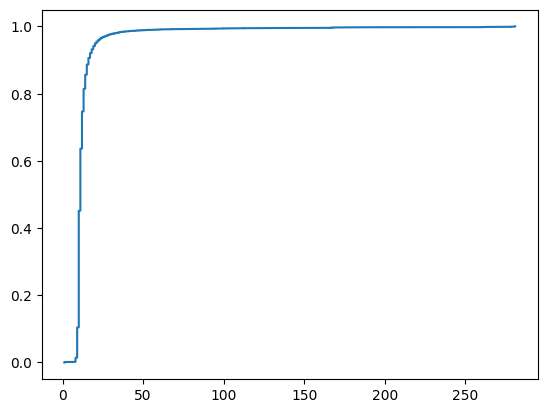

In [76]:
cdf = np.arange(1, len(np.sort(law)) + 1) / len(np.sort(law))
plt.plot(np.sort(law), cdf)

4. 초당적 협력

In [77]:
rel = relation_state.copy()
rel.set_index(['인덱스'], inplace = True)
rel.head(3)

,이름,정당명,번호,상태
인덱스,,,,
PRC_M2L3N1N0M2L5J1S4Q3R7Q3O5W3V5U3,이용우(李龍雨),더불어민주당,9771184,접수
PRC_M2L3N1N0M2L5J1S4Q3R7Q3O5W3V5U3,강훈식(姜勳植),더불어민주당,9771007.0,접수
PRC_M2L3N1N0M2L5J1S4Q3R7Q3O5W3V5U3,김상희(金相姬),더불어민주당,9770527.0,접수


In [79]:
chodang = []
rel_idx = rel.index.unique()
rel_tmp = rel[:]['정당명'].copy()
cnt = 0
for i in rel_idx:
  if type(rel_tmp[i]) != str:
    rel_tmp[i].unique()
    chodang.append(rel_tmp[i].unique())
  else:
    chodang.append(list(rel_tmp[i]))
  print(cnt, end = ' ')
  cnt += 1
print(chodang, sep = ' ')

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [ ]:
S = pd.Series(chodang)
S.value_counts()

[더불어민주당]                                        8142
[국민의힘]                                          5096
[미래통합당]                                          424
[더, 불, 어, 민, 주, 당]                                19
[국, 민, 의, 힘]                                      11
                                                ... 
[더불어민주당, 열린민주당]                                    1
[더불어민주당, 열린민주당, 정의당, 무소속, 기본소득당, 국민의힘, 시대전환]       1
[무소속, 더불어민주당]                                      1
[더불어민주당, 정의당]                                      1
[더불어민주당, 정의당]                                      1
Length: 9268, dtype: int64